**MÓDULO #7 - APRENDIZAJE NO SUPERVISADO**

### **Preparar para Aplicar**

#### **Cargando y visualizando la Base de Datos House Price**

In [ ]:
from sklearn import cluster, metrics
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, Normalizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
house = pd.read_csv("housedata.csv")
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
print(house.dtypes)

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object


In [ ]:
house2 = house.copy()
for col in house2.columns:
    if house2[col].dtype == 'object':
        house2[col] = OrdinalEncoder().fit_transform(house2[[col]])
X_train = house2.to_numpy()
print(X_train)

[[0.00000000e+00 3.13000000e+05 3.00000000e+00 ... 3.60000000e+01
  6.20000000e+01 0.00000000e+00]
 [0.00000000e+00 2.38400000e+06 5.00000000e+00 ... 3.50000000e+01
  5.80000000e+01 0.00000000e+00]
 [0.00000000e+00 3.42000000e+05 3.00000000e+00 ... 1.80000000e+01
  2.60000000e+01 0.00000000e+00]
 ...
 [6.80000000e+01 4.16904167e+05 3.00000000e+00 ... 3.20000000e+01
  3.70000000e+01 0.00000000e+00]
 [6.90000000e+01 2.03400000e+05 4.00000000e+00 ... 3.50000000e+01
  7.10000000e+01 0.00000000e+00]
 [6.90000000e+01 2.20600000e+05 3.00000000e+00 ... 9.00000000e+00
  2.60000000e+01 0.00000000e+00]]


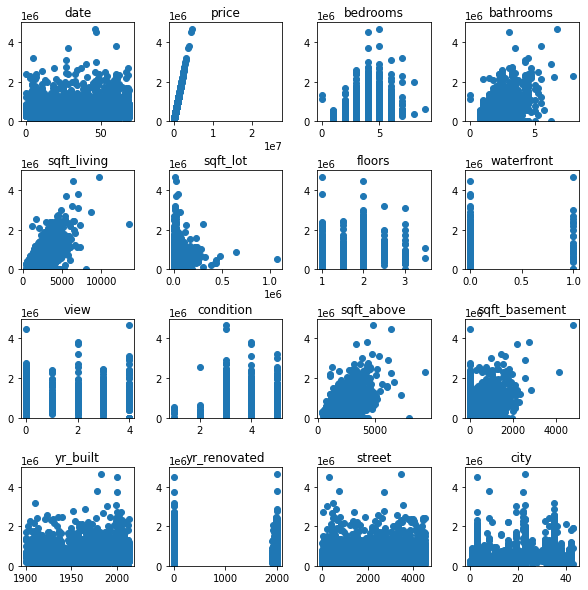

In [ ]:
v = 0
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i in range(4):
  for j in range(4):
    axs[i,j].scatter(X_train[:,v], X_train[:,1])
    axs[i,j].set_title(house.columns[v])
    axs[i,j].set_ylim([0,0.5e7])
    v+=1
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

### **Número de agrupaciones utilizando la gráfica K-Elbow y el índice Silhouette**

In [ ]:
np.random.seed(0)
X = StandardScaler().fit_transform(X_train)
f = 4
t = 'sqft_living'
nc = 11

In [ ]:
results_km = {}
results_sl = {}
results_sc = {}

for k in range(2, nc):
  k_means = cluster.KMeans(n_clusters=k).fit(X)
  y_pred = k_means.predict(X)
  results_km[k] = metrics.silhouette_score(X, y_pred)

  y_pred2 = cluster.AgglomerativeClustering(linkage="single", n_clusters=k).fit_predict(X)
  results_sl[k] = metrics.silhouette_score(X, y_pred2)

  y_pred3 = cluster.SpectralClustering(n_clusters=k, affinity="nearest_neighbors").fit_predict(X)
  results_sc[k] = metrics.silhouette_score(X, y_pred3)

clusters_counts_km = list(results_km.keys())
index_values_km = list(results_km.values())

clusters_counts_sl = list(results_sl.keys())
index_values_sl = list(results_sl.values())

clusters_counts_sc = list(results_sc.keys())
index_values_sc = list(results_sc.values())

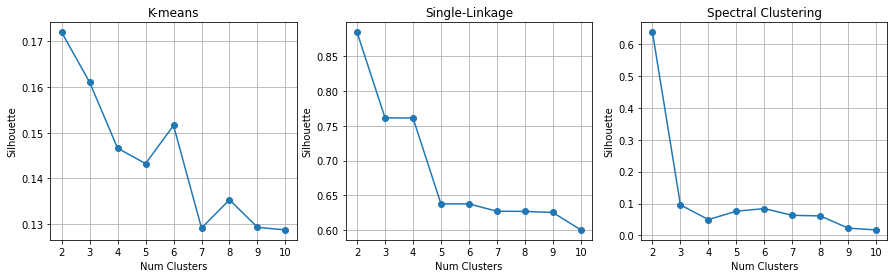

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15,4))

ax0.plot(clusters_counts_km, index_values_km, 'o-')
ax0.grid(True)
ax0.set_title('K-means')
ax0.set_xlabel('Num Clusters')
ax0.set_xticks(clusters_counts_km)
ax0.set_ylabel('Silhouette')

ax1.plot(clusters_counts_sl, index_values_sl, 'o-')
ax1.grid(True)
ax1.set_title('Single-Linkage')
ax1.set_xlabel('Num Clusters')
ax1.set_xticks(clusters_counts_sl)
ax1.set_ylabel('Silhouette')

ax2.plot(clusters_counts_sc, index_values_sc, 'o-')
ax2.grid(True)
ax2.set_title('Spectral Clustering')
ax2.set_xlabel('Num Clusters')
ax2.set_xticks(clusters_counts_sc)
ax2.set_ylabel('Silhouette')

plt.show()

### **Índice Calinski-Harabasz**

In [ ]:
y_preds = []
results = {}
for k in range(2, nc):
  k_means = cluster.KMeans(n_clusters=k).fit(X)
  y_pred = k_means.predict(X)
  y_preds.append(y_pred)
  results[k] = metrics.calinski_harabasz_score(X, y_pred)
clusters_counts = list(results.keys())
index_values = list(results.values())

In [ ]:
print(results[2], results[3])
np.argmax([results[2], results[3]])

837.2804639644598 660.6971395135079


0

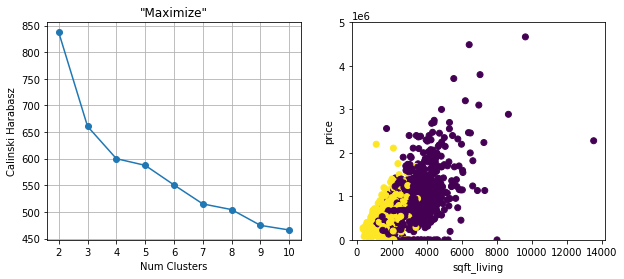

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10,4))

ax0.plot(clusters_counts, index_values, 'o-')
ax0.grid(True)
ax0.set_title('"Maximize"')
ax0.set_xlabel('Num Clusters')
ax0.set_xticks(clusters_counts)
ax0.set_ylabel('Calinski Harabasz')

ax1.scatter(X_train[:, f], X_train[:, 1], c=y_preds[0])
ax1.set_ylim(0, 0.5e7)
ax1.set_xlabel(t)
ax1.set_ylabel('price')

plt.show()

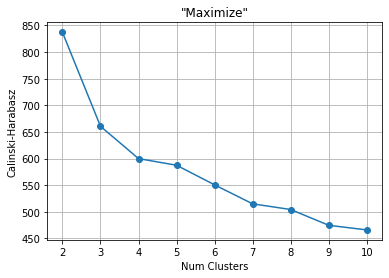

In [ ]:
plt.plot(clusters_counts, index_values, 'o-')
plt.grid(True)
plt.title('"Maximize"')
plt.xlabel('Num Clusters')
plt.xticks(clusters_counts)
plt.ylabel('Calinski-Harabasz')
plt.show()

### **Número de agrupaciones utilizando los valores de los coeficientes de Silhouette (gráfica SilhouettePlot)**

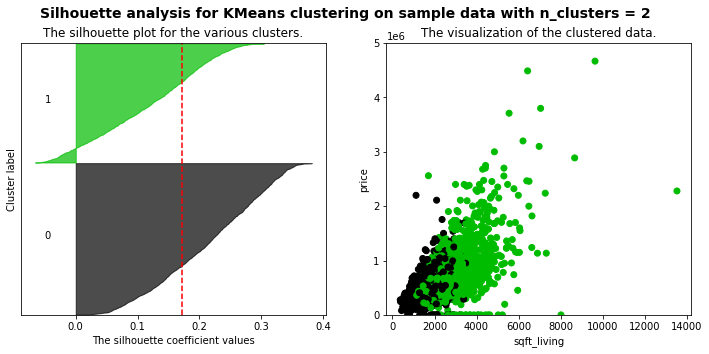

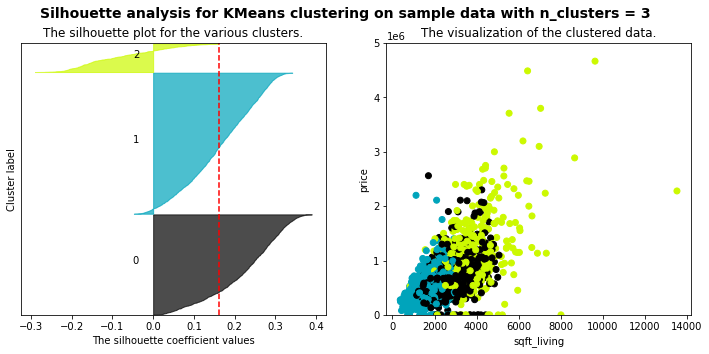

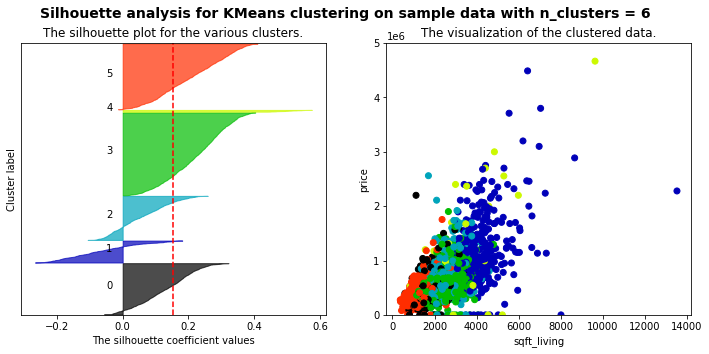

In [ ]:
import matplotlib.cm as cm
for k in [2, 3, 6]:
  fig, (ax0, ax1) = plt.subplots(1, 2)
  fig.set_size_inches(12, 5)
  # The (k+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax0.set_ylim([0, len(X) + (k + 1) * 10])
  k_means = cluster.KMeans(n_clusters=k)
  y_pred = k_means.fit_predict(X)
  silhouette_avg = metrics.silhouette_score(X, y_pred)
  sample_silhouette_values = metrics.silhouette_samples(X, y_pred)
  y_lower = 10
  for i in range(k):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / k)
    ax0.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    # Label the silhouette plots with their cluster numbers at the middle
    ax0.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
  ax0.set_title("The silhouette plot for the various clusters.")
  ax0.set_xlabel("The silhouette coefficient values")
  ax0.set_ylabel("Cluster label")
  ax0.set_yticks([])  # Clear the yaxis labels / ticks
  # The vertical line for average silhouette score of all the values
  ax0.axvline(x=silhouette_avg, color="red", linestyle="--")
  # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(y_pred.astype(float) / k)
  ax1.scatter(X_train[:, f], X_train[:, 1], c=colors)
  ax1.set_ylim(0, 0.5e7)
  ax1.set_title("The visualization of the clustered data.")
  ax1.set_xlabel(t)
  ax1.set_ylabel('price')
  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % k),
                fontsize=14, fontweight='bold')
plt.show()